<a href="https://colab.research.google.com/github/dsdayat/HW_Cleaning-Data/blob/main/HW_DATA_CLEANING_AGUS_NUR_HIDAYAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [476]:
df = pd.read_csv('diamonds_hw.csv')

In [477]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [478]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [479]:
df.info()#untuk tau missing value beserta data type nya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [480]:
(125/53940)*100 #persentase missing value

0.23173896922506487

In [481]:
df.isna().sum() #untuk tau berapa banyak missing valuenya abis itu cari persentasenya kaya diatas

carat      125
cut          0
color        0
clarity      0
depth        0
table        0
price        0
x            0
y            0
z            0
dtype: int64

In [482]:
df[df['carat'].isna()]#untuk cari yg null mnya aja pake df df

,carat,cut,color,clarity,depth,table,price,x,y,z
194,NaN,Premium,E,SI1,61.2,57.0,2777,5.73,5.68,3.49
241,NaN,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03
251,NaN,Good,G,SI2,61.0,61.0,2789,5.94,5.99,3.64
644,NaN,Very Good,F,SI2,63.2,58.0,2843,5.91,5.92,3.74
704,NaN,Fair,J,VS2,65.4,60.0,2854,6.04,6.00,3.94
...,...,...,...,...,...,...,...,...,...,...
50207,NaN,Ideal,F,VS1,60.3,57.0,2227,5.47,5.44,3.29
50559,NaN,Premium,H,SI1,62.7,59.0,2277,5.69,5.73,3.58
53019,NaN,Very Good,H,VS2,58.7,61.0,2599,5.96,5.99,3.51
53234,NaN,Ideal,F,SI1,61.9,57.0,2642,5.88,5.91,3.65


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:

*   List item
*   List item


- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___). 

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik). 

2. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

#### Nomor 1:

In [483]:
#selanjutnya copy df dan bikin dfnew
dfnew=df.copy()

In [484]:

dfnew=dfnew[~dfnew['carat'].isna()].reset_index(drop=True)#pake negasi dan didefine lagi dfnew=

In [485]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53815 entries, 0 to 53814
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53815 non-null  object 
 2   color    53815 non-null  object 
 3   clarity  53815 non-null  object 
 4   depth    53815 non-null  float64
 5   table    53815 non-null  float64
 6   price    53815 non-null  int64  
 7   x        53815 non-null  float64
 8   y        53815 non-null  float64
 9   z        53815 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [486]:
dfnew.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

saya memilih metode remove rows missing value untuk mengisi value pada kolom carat karena 
persentase missing value 0.23% dibawah 50%

#### Nomor 2:

In [487]:
dfnew.groupby(['clarity']).sum()#buat cari berapa banyak kategori clarity atau pake unique juga bisa

,carat,depth,table,price,x,y,z
clarity,,,,,,,
I1,950.32,46421.6,43145.1,2905021,5003.68,4965.44,3114.03
IF,902.02,109793.6,100865.9,5120071,8869.58,8907.99,5465.59
SI1,11075.27,805810.4,751237.1,52024080,76703.32,76701.81,47412.64
SI2,9892.95,566942.6,531654.5,46487437,58757.15,58724.29,36242.22
VS1,5919.66,502346.2,466884.1,31242722,45380.38,45459.05,28024.21
VS2,9347.36,755132.7,702436.5,48036063,69219.60,69233.41,42716.35
VVS1,1836.38,224739.5,207455.7,9205243,18093.63,18147.16,11166.22
VVS2,3014.52,311833.5,288364.6,16599616,26387.96,26457.10,16289.86


In [488]:
dfnew['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [489]:
pd.get_dummies(dfnew['clarity'],prefix='clarity')

,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
53810,0,0,1,0,0,0,0,0
53811,0,0,1,0,0,0,0,0
53812,0,0,1,0,0,0,0,0
53813,0,0,0,1,0,0,0,0


In [490]:
dfone=dfnew.join(pd.get_dummies(dfnew['clarity'],prefix='clarity'))
dfone

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53810,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0,0,0,0
53811,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,0,0,0,0,0
53812,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,0,0,0,0,0
53813,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0,0,0,0


#### Nomor 3:

Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

In [491]:
import seaborn as sns

In [492]:
dfx=df.copy()
dfy=df.copy()
dfz=df.copy()

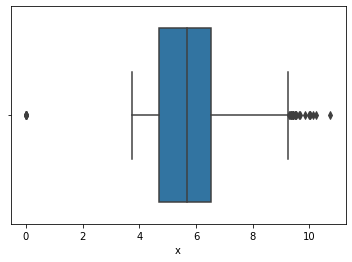

In [493]:
#x pake dfx
sns.boxplot(x=dfx['x'])
plt.show()

In [494]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data[column].values]

In [495]:
dfx['outlier_x']=check_outlier(data=dfx,column='x')

In [497]:
dfx[dfx['outlier_x']=='outlier']

,carat,cut,color,clarity,depth,table,price,x,y,z,outlier_x
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00,outlier
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00,outlier
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00,outlier
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31,outlier
22831,3.00,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33,outlier
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38,outlier
24131,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85,outlier
24297,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92,outlier
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03,outlier
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00,outlier


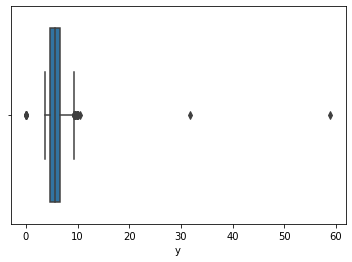

In [498]:
#y pake dfy
sns.boxplot(x=dfy['y'])
plt.show()

In [503]:
dfy['outlier_y']=check_outlier(data=dfx,column='y')

In [505]:
dfy[dfy['outlier_y']=='outlier']

,carat,cut,color,clarity,depth,table,price,x,y,z,outlier_y
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00,outlier
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00,outlier
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31,outlier
22831,3.00,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33,outlier
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38,outlier
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,outlier
24131,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85,outlier
24297,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92,outlier
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03,outlier
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00,outlier


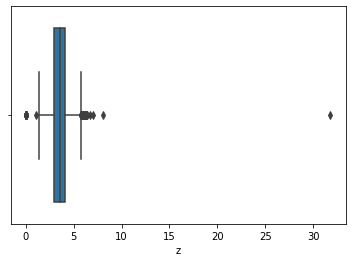

In [499]:
#z
sns.boxplot(x=dfz['z'])
plt.show()

In [507]:
dfz['outlier_z']=check_outlier(data=dfz,column='z')

In [508]:
dfz[dfz['outlier_z']=='outlier']

,carat,cut,color,clarity,depth,table,price,x,y,z,outlier_z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00,outlier
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00,outlier
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00,outlier
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00,outlier
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00,outlier
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00,outlier
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00,outlier
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.00,outlier
14635,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07,outlier
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00,outlier
